<h2>Лабораторная работа №5</h2>
<h1 style="font-size: 30px; font-family: Georgia, serif;">Изучение моделей классификации и регрессии. </h1>

<h2>1. Набор данных диабета </h2>

In [27]:
import mglearn
import numpy as np
import mglearn.datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print("Keys of diabetes(): \n{}".format(diabetes.keys()))

Keys of diabetes(): 
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [18]:
print("Shape of the array data for diabetes dataset: {}".format(diabetes.data.shape))

Shape of the array data for diabetes dataset: (442, 10)


In [19]:
print("Name of the features:\n{}".format(diabetes.feature_names))

Name of the features:
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [20]:
print(diabetes['DESCR']+"\n...")

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [21]:
diabetes_data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_data.head(15)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504


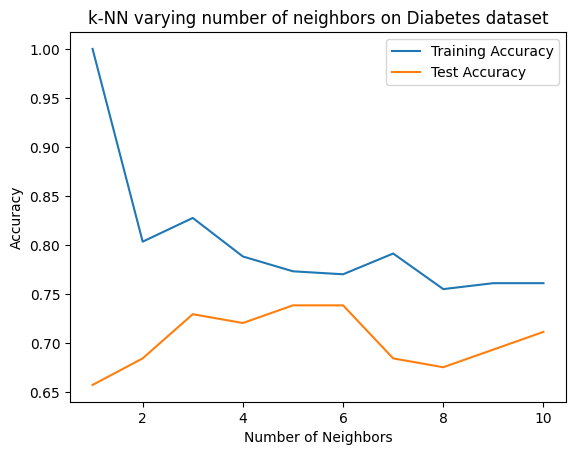

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

target_class = (diabetes.target > 140).astype(int)

X_train, X_test, y_train, y_test = train_test_split(diabetes.data, target_class, stratify=target_class, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of Neighbors")
plt.legend()
plt.title("k-NN varying number of neighbors on Diabetes dataset")
plt.show()


In [40]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [41]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [42]:
print("Prediction on the test set: {}".format(clf.predict(X_test)))

Prediction on the test set: [0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1
 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1]


In [43]:
print("Correctness on the test set: {:.2f}".format(clf.score(X_test,y_test)))

Correctness on the test set: 0.73


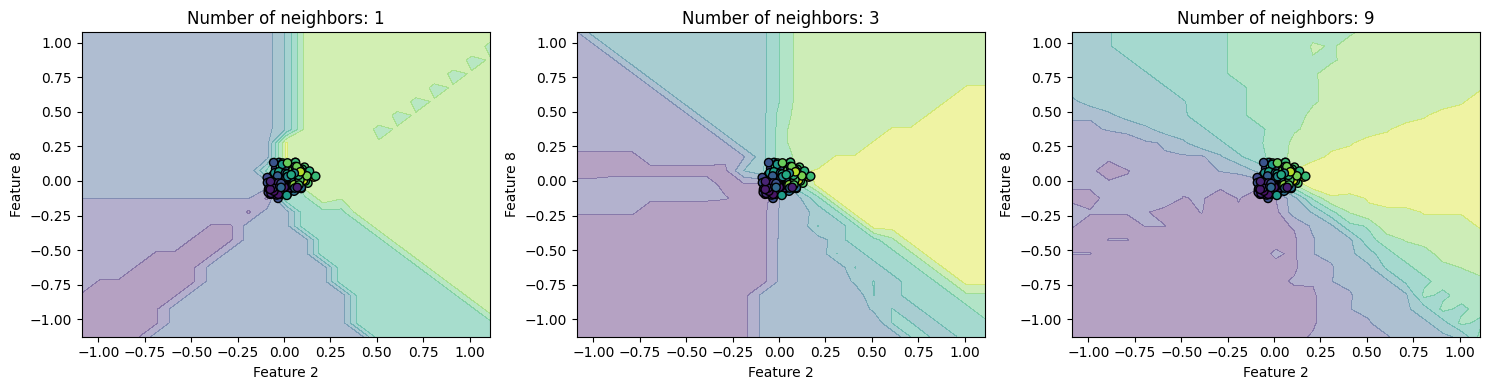

In [59]:
from sklearn.neighbors import KNeighborsRegressor

X, y = diabetes.data, diabetes.target

# Choose two features for visualization
feature_1 = 2  # Change these indices to visualize different features
feature_2 = 8  # Change these indices to visualize different features

X_sub = X[:, [feature_1, feature_2]]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for n_neighbors, ax in zip([1, 3, 9], axes):
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_sub, y)
    
    x_min, x_max = X_sub[:, 0].min() - 1, X_sub[:, 0].max() + 1
    y_min, y_max = X_sub[:, 1].min() - 1, X_sub[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X_sub[:, 0], X_sub[:, 1], c=y, edgecolor='k')
    
    ax.set_title("Number of neighbors: {}".format(n_neighbors))
    ax.set_xlabel("Feature {}".format(feature_1))
    ax.set_ylabel("Feature {}".format(feature_2))

plt.tight_layout()
plt.show()


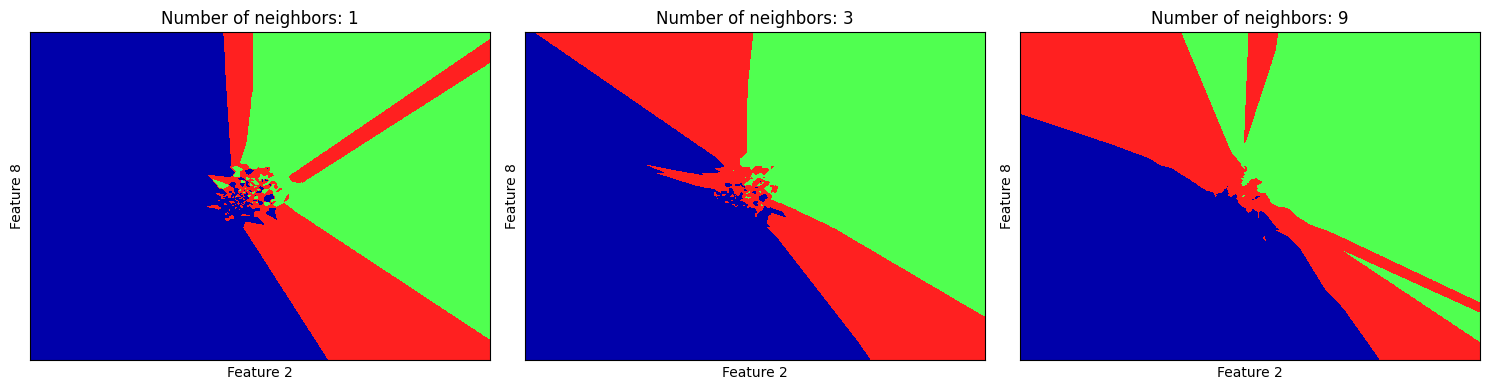

In [58]:
from sklearn.neighbors import KNeighborsRegressor

X, y = diabetes.data, diabetes.target

# Choose two features for visualization
feature_1 = 2  # Change these indices to visualize different features
feature_2 = 8  # Change these indices to visualize different features

X_sub = X[:, [2,8]]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for n_neighbors, ax in zip([1, 3, 9], axes):
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_sub, y)
    
    mglearn.tools.plot_2d_classification(knn, X_sub, ax=ax, eps=0.5)
    
    ax.set_title("Number of neighbors: {}".format(n_neighbors))
    ax.set_xlabel("Feature {}".format(feature_1))
    ax.set_ylabel("Feature {}".format(feature_2))

plt.tight_layout()
plt.show()